# Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor #this is the neural network part
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import random
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
!pip install -U dmba;
from dmba import regressionSummary
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 20.8 MB/s eta 0:00:00
Colab environment detected.


# Loading Data

Data: https://www.kaggle.com/datasets/ravi72munde/uber-lyft-cab-prices/code


In [3]:
# Reading in Data

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
cab_ridesDF = pd.read_csv('/content/drive/My Drive/BA305/cab_rides.csv')
weatherDF = pd.read_csv('/content/drive/My Drive/BA305/weather.csv')

Mounted at /content/drive


In [4]:
cab_ridesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [5]:
cab_ridesDF.head(10)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
5,0.44,Lyft,1545071112138,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black
6,1.08,Lyft,1543208580200,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL
7,1.08,Lyft,1543780384677,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black
8,1.08,Lyft,1543818482645,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared
9,1.08,Lyft,1543315522249,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL


In [6]:
weatherDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


# Outcome Variable Investigation


## Preliminary Visualization


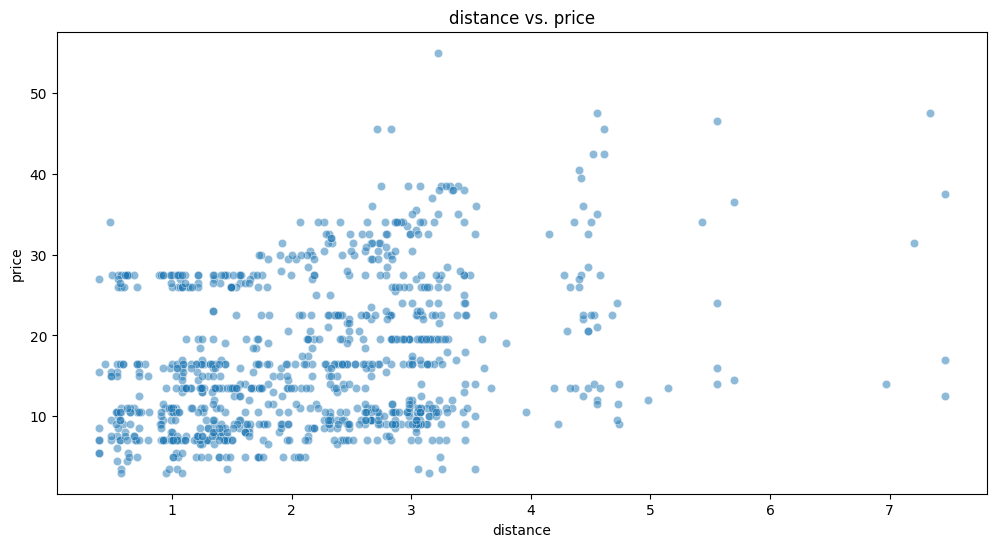

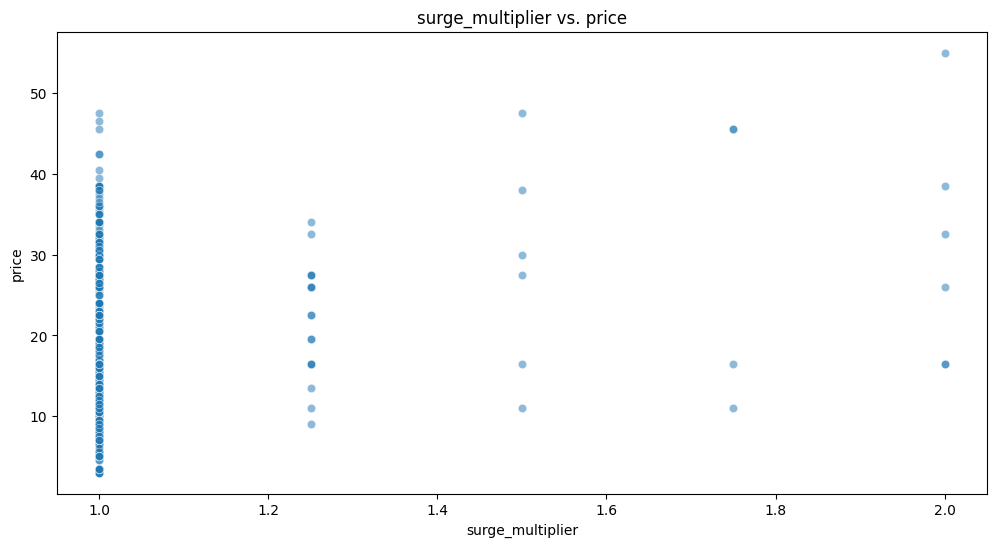

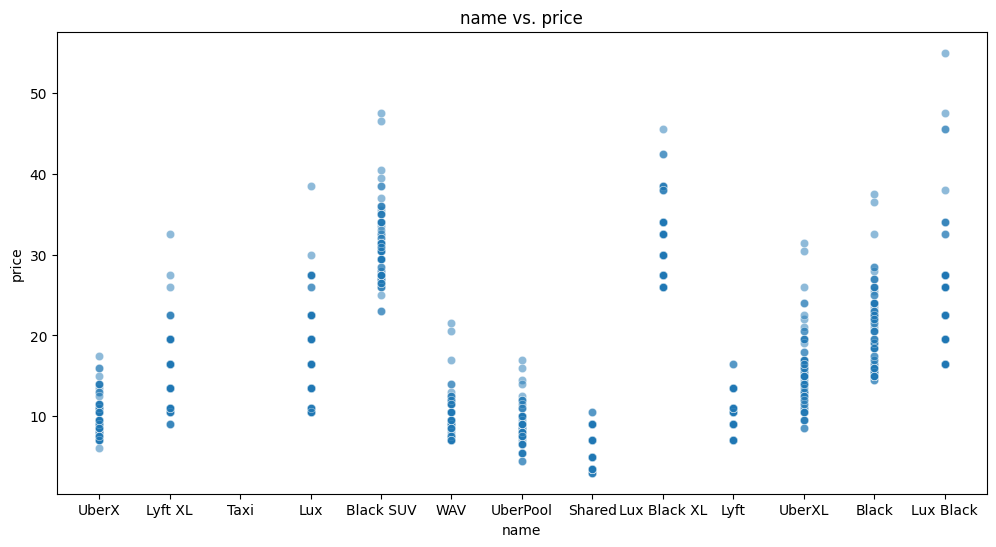

In [ ]:
# For continuous variables -- checking relationship between price and cabDF continuous variables with a representative sample
def scatterplot(xvar, sample_size=None, alpha=0.2):
    plt.figure(figsize=(12, 6))

    # Randomly sample data if sample_size is provided
    if sample_size:
        sample_data = cab_ridesDF.sample(sample_size, random_state=42)
    else:
        sample_data = cab_ridesDF

    sns.scatterplot(x=xvar, y='price', data=sample_data, alpha=alpha)
    plt.title(f'{xvar} vs. price')
    plt.xlabel(xvar)
    plt.ylabel('price')
    plt.show()

# Example usage with sampling and alpha parameter
scatterplot('distance', sample_size=1000, alpha=0.5)
scatterplot('surge_multiplier', sample_size=1000, alpha=0.5)
scatterplot('name', sample_size=1000, alpha=0.5)


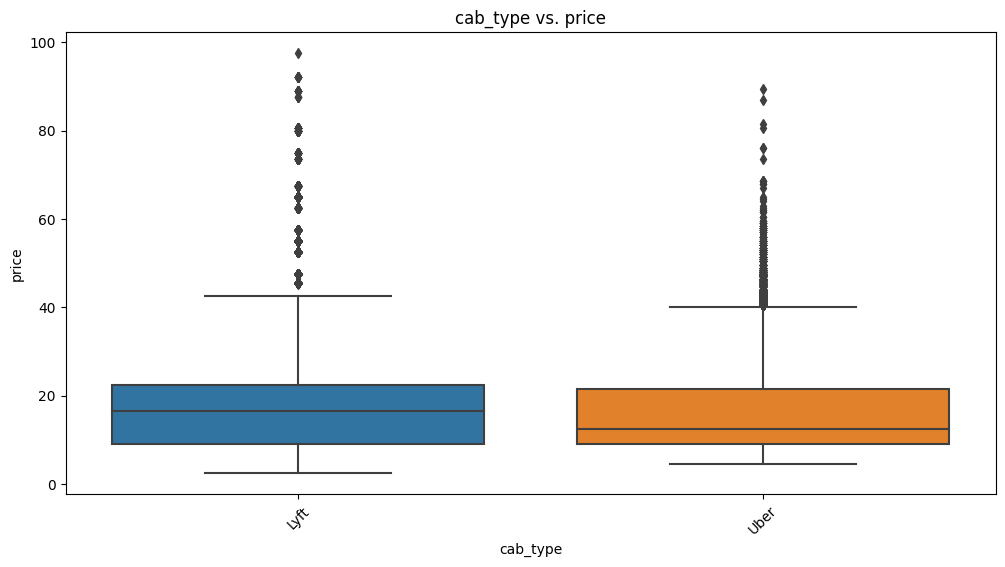

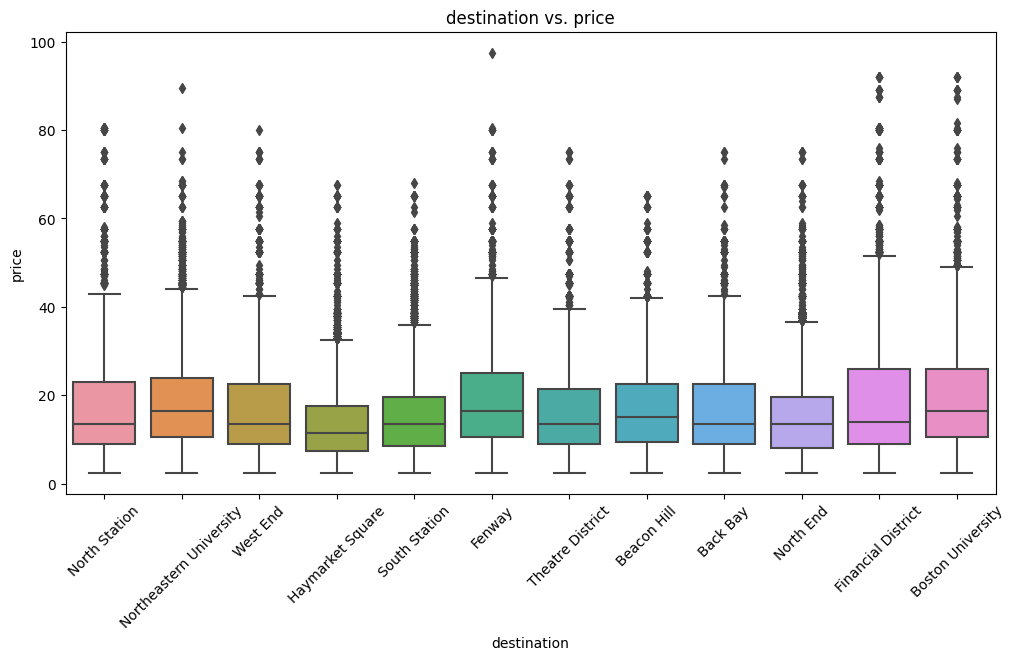

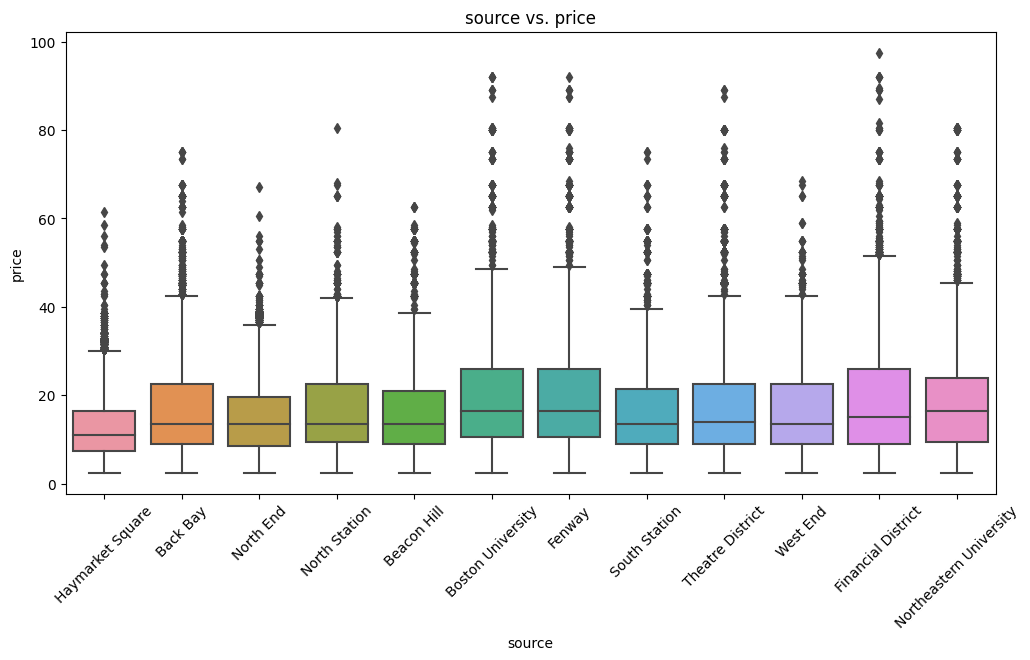

In [ ]:
def boxplot_categorical(xvar, yvar='price', sample_size=2000):
    plt.figure(figsize=(12, 6))

    # Randomly sample data if sample_size is provided
    if sample_size and sample_size < len(cab_ridesDF):
        unique_values = cab_ridesDF[xvar].unique()
        selected_values = random.sample(list(unique_values), min(sample_size, len(unique_values)))
        sample_data = cab_ridesDF[cab_ridesDF[xvar].isin(selected_values)]
    else:
        sample_data = cab_ridesDF

    sns.boxplot(x=xvar, y=yvar, data=sample_data)
    plt.title(f'{xvar} vs. {yvar}')
    plt.xlabel(xvar)
    plt.ylabel(yvar)
    plt.xticks(rotation=45) # Added this to make our visulizations cleaner for the slides

    plt.show()

# Example usage with sampling
boxplot_categorical('cab_type', sample_size=1000)
boxplot_categorical('destination', sample_size=1000)
boxplot_categorical('source', sample_size=1000)


# Cleaning Data

In [7]:
weatherDF = weatherDF.fillna(0)
# Did not clean rides, only missing values are in price and we need price - ignoring this

In [8]:
cab_ridesDF = cab_ridesDF.dropna()
cab_ridesDF = cab_ridesDF[cab_ridesDF['cab_type'] != 'Uber'] # experimenting
cab_ridesDF.info()
# We are okay with dropping na columns since we are still left with 92% of our original data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307408 entries, 0 to 693053
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          307408 non-null  float64
 1   cab_type          307408 non-null  object 
 2   time_stamp        307408 non-null  int64  
 3   destination       307408 non-null  object 
 4   source            307408 non-null  object 
 5   price             307408 non-null  float64
 6   surge_multiplier  307408 non-null  float64
 7   id                307408 non-null  object 
 8   product_id        307408 non-null  object 
 9   name              307408 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 25.8+ MB


In [9]:
# Organizing weather
weatherDF.groupby('location').mean()
avr_weather_df = weatherDF.groupby('location').mean().reset_index(drop=False)
avr_weather_df = avr_weather_df.drop('time_stamp', axis=1)
# Merging Dataframes
source_weather_df= avr_weather_df.rename(
columns={
    'location':'source',
    'temp':'source_temp',
    'clouds': 'source_clouds',
    'pressure':'source_pressure',
    'rain': 'source_rain',
    'humidity':'source_humidity',
    'wind':'source_wind'
}
)
destination_weather_df= avr_weather_df.rename(
columns={
    'location':'destination',
    'temp':'destination_temp',
    'clouds': 'destination_clouds',
    'pressure':'destination_pressure',
    'rain': 'destination_rain',
    'humidity':'destination_humidity',
    'wind':'destination_wind'
}
)
data = cab_ridesDF\
    .merge(source_weather_df, on ='source')\
    .merge(destination_weather_df, on='destination')
pd.set_option('display.max_columns', None)
data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307403,1.09,Lyft,1543529286284,North End,West End,7.0,1.0,7e92b41c-660d-49a8-a2ba-e4512d0f0a91,lyft,Lyft,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
307404,1.09,Lyft,1543529286284,North End,West End,13.5,1.0,a7cfdb95-13ce-49ce-8266-6b80fa94e411,lyft_premier,Lux,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
307405,1.09,Lyft,1543529286284,North End,West End,27.5,1.0,af4bd08e-a6f3-43e5-b982-1ae2219cb508,lyft_luxsuv,Lux Black XL,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
307406,1.09,Lyft,1544961611863,North End,West End,10.5,1.0,fa2fd3b5-a92c-4f64-9362-0c98ebf96ca6,lyft_plus,Lyft XL,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117


In [ ]:
# Dropped id because index can be our id if needed
# Dropped product_id due to lack of information gain and its similarity to name
# Dropped cab_type because now we only have one company's prices as our target prediction
cols = ['id','product_id', 'cab_type']
data = data.drop(cols, axis =1)
data

,distance,time_stamp,destination,source,price,surge_multiplier,name,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,1544952607890,North Station,Haymarket Square,5.0,1.0,Shared,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,1543284023677,North Station,Haymarket Square,11.0,1.0,Lux,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,1543366822198,North Station,Haymarket Square,7.0,1.0,Lyft,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,1543553582749,North Station,Haymarket Square,26.0,1.0,Lux Black XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,1543463360223,North Station,Haymarket Square,9.0,1.0,Lyft XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307403,1.09,1543529286284,North End,West End,7.0,1.0,Lyft,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
307404,1.09,1543529286284,North End,West End,13.5,1.0,Lux,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
307405,1.09,1543529286284,North End,West End,27.5,1.0,Lux Black XL,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
307406,1.09,1544961611863,North End,West End,10.5,1.0,Lyft XL,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117


In [ ]:
# Make the time_stamp more readable
data['time_stamp'] = pd.to_datetime(data['time_stamp'], unit='ms')
data['weekday'] = data['time_stamp'].dt.day_name()
data['time'] = data['time_stamp'].dt.time
data = data.drop("time_stamp", axis =1)
data['time'] = data['time'].apply(lambda x: x.microsecond + (x.second + x.minute * 60 + x.hour * 3600) * 1e6) # seconds since midnight

data

,distance,destination,source,price,surge_multiplier,name,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind,weekday,time
0,0.44,North Station,Haymarket Square,5.0,1.0,Shared,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,Sunday,3.420789e+10
1,0.44,North Station,Haymarket Square,11.0,1.0,Lux,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,Tuesday,7.223677e+09
2,0.44,North Station,Haymarket Square,7.0,1.0,Lyft,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,Wednesday,3.622198e+09
3,0.44,North Station,Haymarket Square,26.0,1.0,Lux Black XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,Friday,1.758275e+10
4,0.44,North Station,Haymarket Square,9.0,1.0,Lyft XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755,Thursday,1.376022e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307403,1.09,North End,West End,7.0,1.0,Lyft,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117,Thursday,7.968628e+10
307404,1.09,North End,West End,13.5,1.0,Lux,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117,Thursday,7.968628e+10
307405,1.09,North End,West End,27.5,1.0,Lux Black XL,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117,Thursday,7.968628e+10
307406,1.09,North End,West End,10.5,1.0,Lyft XL,38.983403,0.677247,1008.441090,0.008657,0.767266,6.816233,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117,Sunday,4.321186e+10


In [ ]:
# Dropping these columns bc pressure and humidity should not have a huge effect on price based off of prior knowledge, especially when other weather patterns are accounted for through other variables
cols = ["source_pressure", "source_humidity", "destination_pressure", "destination_humidity"]
data = data.drop(cols, axis =1)

# For the following drops, since all rides are occuring within the same area, weather patterns will be approx the same. We do not need to differentiate these things so greatly.
data['temp'] = data[['source_temp', 'destination_temp']].mean(axis=1)
data = data.drop(['source_temp', 'destination_temp'], axis=1)

data['clouds'] = data[['source_clouds', 'destination_clouds']].mean(axis=1)
data = data.drop(['source_clouds', 'destination_clouds'], axis=1)

data['rain'] = data[['source_rain', 'destination_rain']].mean(axis=1)
data = data.drop(['source_rain', 'destination_rain'], axis=1)

data['wind'] = data[['source_wind', 'destination_wind']].mean(axis=1)
data = data.drop(['source_wind', 'destination_wind'], axis=1)

data

,distance,destination,source,price,surge_multiplier,name,weekday,time,temp,clouds,rain,wind
0,0.44,North Station,Haymarket Square,5.0,1.0,Shared,Sunday,3.420789e+10,39.051606,0.676855,0.008654,6.839474
1,0.44,North Station,Haymarket Square,11.0,1.0,Lux,Tuesday,7.223677e+09,39.051606,0.676855,0.008654,6.839474
2,0.44,North Station,Haymarket Square,7.0,1.0,Lyft,Wednesday,3.622198e+09,39.051606,0.676855,0.008654,6.839474
3,0.44,North Station,Haymarket Square,26.0,1.0,Lux Black XL,Friday,1.758275e+10,39.051606,0.676855,0.008654,6.839474
4,0.44,North Station,Haymarket Square,9.0,1.0,Lyft XL,Thursday,1.376022e+10,39.051606,0.676855,0.008654,6.839474
...,...,...,...,...,...,...,...,...,...,...,...,...
307403,1.09,North End,West End,7.0,1.0,Lyft,Thursday,7.968628e+10,39.037122,0.676989,0.008651,6.834675
307404,1.09,North End,West End,13.5,1.0,Lux,Thursday,7.968628e+10,39.037122,0.676989,0.008651,6.834675
307405,1.09,North End,West End,27.5,1.0,Lux Black XL,Thursday,7.968628e+10,39.037122,0.676989,0.008651,6.834675
307406,1.09,North End,West End,10.5,1.0,Lyft XL,Sunday,4.321186e+10,39.037122,0.676989,0.008651,6.834675


In [ ]:
data.head()

,distance,destination,source,price,surge_multiplier,name,weekday,time,temp,clouds,rain,wind
0,0.44,North Station,Haymarket Square,5.0,1.0,Shared,Sunday,3.420789e+10,39.051606,0.676855,0.008654,6.839474
1,0.44,North Station,Haymarket Square,11.0,1.0,Lux,Tuesday,7.223677e+09,39.051606,0.676855,0.008654,6.839474
2,0.44,North Station,Haymarket Square,7.0,1.0,Lyft,Wednesday,3.622198e+09,39.051606,0.676855,0.008654,6.839474
3,0.44,North Station,Haymarket Square,26.0,1.0,Lux Black XL,Friday,1.758275e+10,39.051606,0.676855,0.008654,6.839474
4,0.44,North Station,Haymarket Square,9.0,1.0,Lyft XL,Thursday,1.376022e+10,39.051606,0.676855,0.008654,6.839474


# Preliminary Visulizations Post Data Clean


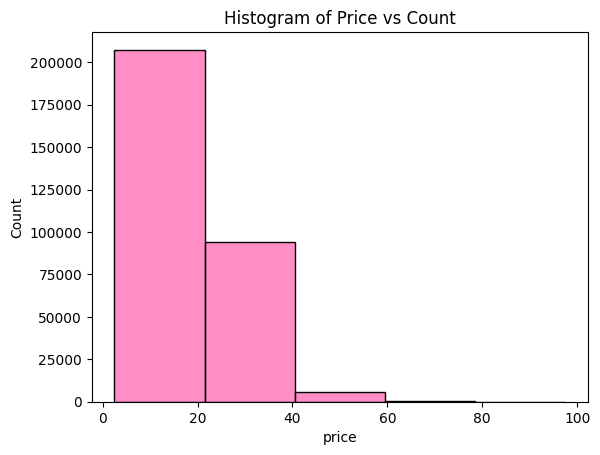

In [ ]:
sns.histplot(data=data, x="price", bins=5, color="hotpink")
plt.title('Histogram of Price vs Count')
plt.show()

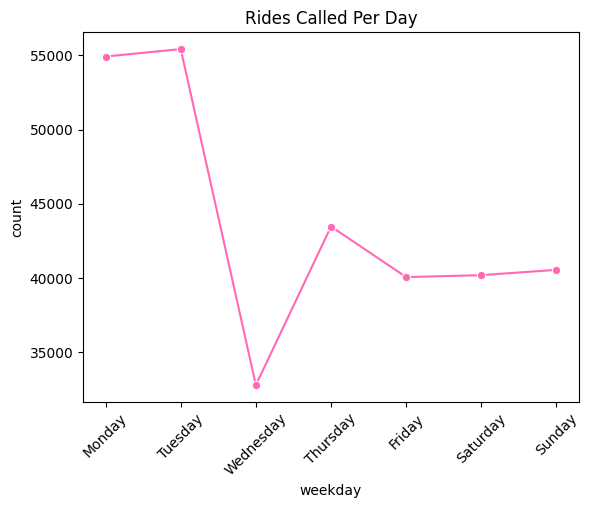

In [ ]:
desired_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data['weekday'] = pd.Categorical(data['weekday'], desired_order)
count_data = data.groupby('weekday').size().reset_index(name='count')

sns.lineplot(data=count_data, x="weekday", y="count", marker="o", color="hotpink")

plt.title('Rides Called Per Day')
plt.xticks(rotation=45) #added this to make our visulizations cleaner for the slides
plt.show()

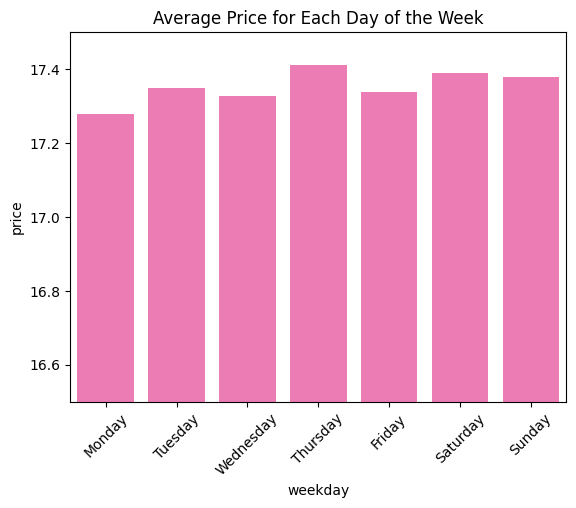

In [ ]:
avg_price_per_day = data.groupby('weekday')['price'].mean().reset_index()
sns.barplot(data=avg_price_per_day, x='weekday', y='price', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color="hotpink")

plt.ylim(16.5, 17.5)
plt.title('Average Price for Each Day of the Week')
plt.xticks(rotation=45)
plt.show()

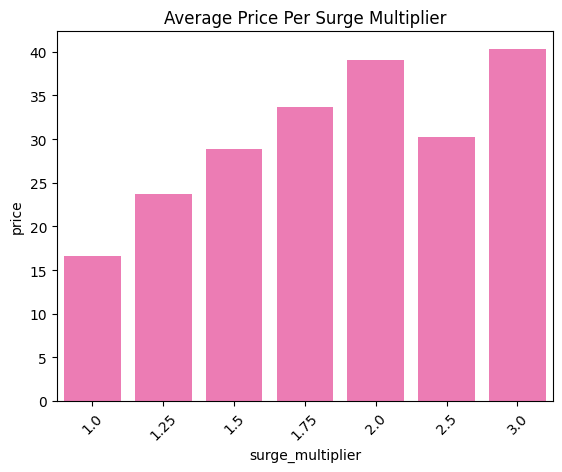

In [ ]:
avg_price_per_surge_multiplier = data.groupby('surge_multiplier')['price'].mean().reset_index()
sns.barplot(data=avg_price_per_surge_multiplier, x='surge_multiplier', y='price', color="hotpink")

plt.title('Average Price Per Surge Multiplier')
plt.xticks(rotation=45)
plt.show()

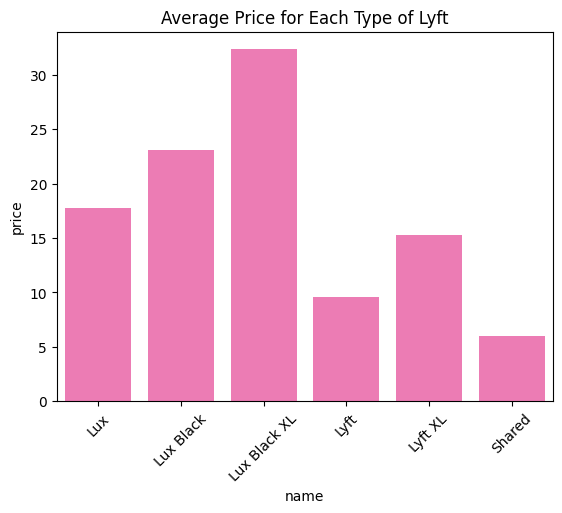

In [ ]:
avg_price_per_name = data.groupby('name')['price'].mean().reset_index()
sns.barplot(data=avg_price_per_name, x='name', y='price', color="hotpink")

plt.title('Average Price for Each Type of Lyft')
plt.xticks(rotation=45)
plt.show()

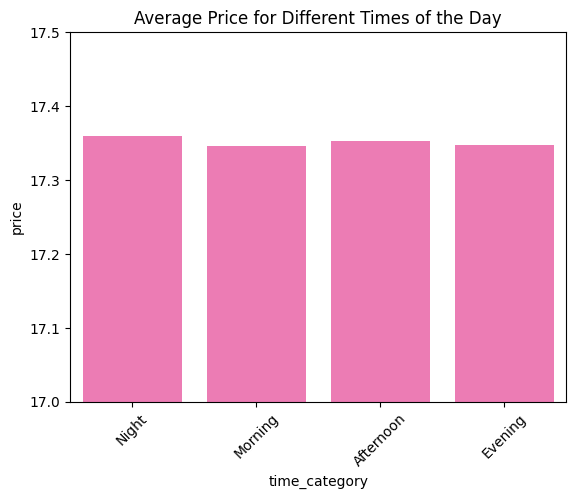

In [ ]:
# Creating a function to categorize time into Morning, Afternoon, Evening, Night
def categorize_time_period(time):
    if 0 <= time < 6 * 3600 * 1e6:
        return 'Night'
    elif 6 * 3600 * 1e6 <= time < 12 * 3600 * 1e6:
        return 'Morning'
    elif 12 * 3600 * 1e6 <= time < 18 * 3600 * 1e6:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the categorization function to create a new column
data1 = data
data1['time_category'] = data1['time'].apply(categorize_time_period)

# Group by 'time_category' and calculate the mean price for each time category
avg_price_per_time = data1.groupby('time_category')['price'].mean().reset_index()

# Create a bar chart of the average price for each time category
sns.barplot(data=avg_price_per_time, x='time_category', y='price', order=['Night', 'Morning', 'Afternoon', 'Evening'], color="hotpink")

plt.title('Average Price for Different Times of the Day')
plt.ylim(17, 17.5)
plt.xticks(rotation=45)
plt.show()
data = data.drop('time_category', axis =1)

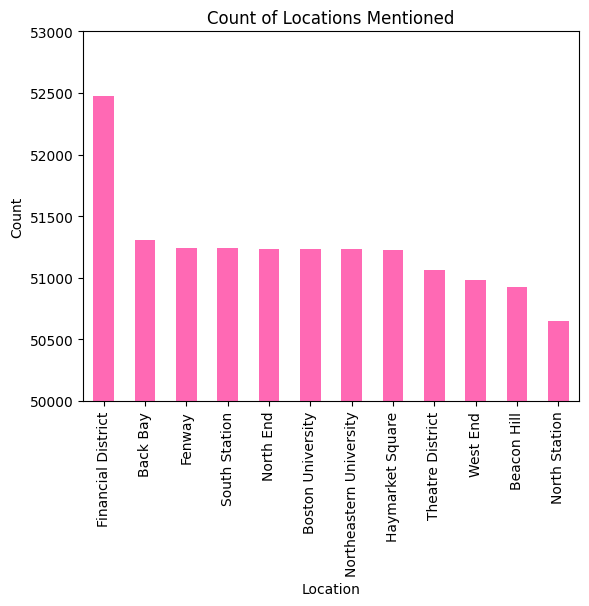

In [ ]:
data1 = data
locations = pd.concat([data1['source'], data1['destination']])

# Create a bar graph for the count of each location
location_counts = locations.value_counts()

# Plot the bar graph
location_counts.plot(kind='bar', color='hotpink')
plt.title('Count of Locations Mentioned')
plt.xlabel('Location')
plt.ylabel('Count')
plt.ylim(50000, 53000)
plt.show()

# Naive Model

In [ ]:
# Getting a benchmark accuracy to compare all our models to

average_price = data['price'].mean()
data1 = data
data1['squared_diff'] = (data1['price'] - average_price) ** 2
mse = data1['squared_diff'].mean()
rmse = mse**.5
print(average_price, rmse)

17.35139612501952 10.019154465595877


# Dimension Reduction

In [ ]:
data.head()

,distance,destination,source,price,surge_multiplier,name,weekday,time,temp,clouds,rain,wind
0,0.44,North Station,Haymarket Square,5.0,1.0,Shared,Sunday,3.420789e+10,39.051606,0.676855,0.008654,6.839474
1,0.44,North Station,Haymarket Square,11.0,1.0,Lux,Tuesday,7.223677e+09,39.051606,0.676855,0.008654,6.839474
2,0.44,North Station,Haymarket Square,7.0,1.0,Lyft,Wednesday,3.622198e+09,39.051606,0.676855,0.008654,6.839474
3,0.44,North Station,Haymarket Square,26.0,1.0,Lux Black XL,Friday,1.758275e+10,39.051606,0.676855,0.008654,6.839474
4,0.44,North Station,Haymarket Square,9.0,1.0,Lyft XL,Thursday,1.376022e+10,39.051606,0.676855,0.008654,6.839474


<ipython-input-20-8774dea9f6ea>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


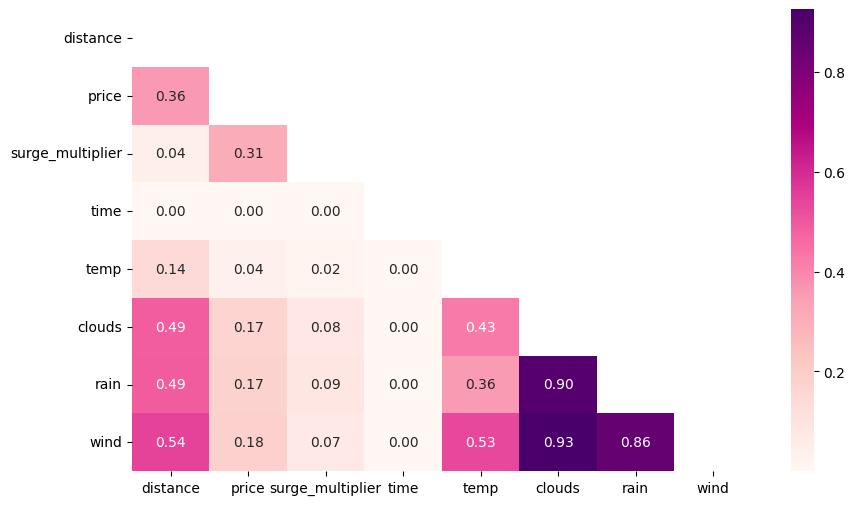

In [ ]:
# Correlation Heat Map

# Calculate correlation matrix
corr_mat = data.corr()

# Create a mask for the lower triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Create seaborn heatmap with masked lower triangle, making everything absolute so we can account for the magnitude of corr but not the sign
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the horizontal size of the figure
sns.heatmap(np.absolute(corr_mat), annot=True, fmt=".2f", cmap='RdPu', mask=mask, ax=ax)  # Format values to 2 decimal places

# Display the heatmap
plt.show()

Seems to be a lot of correlation in regards to the weather. Using PCA we hopefully can learn how to combine some of these variables

In [ ]:
# Drop price bc we predicting that
cols = ['price']
pca_data = data.drop(cols, axis =1)

In [ ]:
# Apply label encoding to the specified categorical columns

label_encoder_destination = LabelEncoder()
data['destination'] = label_encoder_destination.fit_transform(data['destination'])
destination_labels = label_encoder_destination.classes_

label_encoder_source = LabelEncoder()
data['source'] = label_encoder_source.fit_transform(data['source'])
source_labels = label_encoder_source.classes_

label_encoder_name = LabelEncoder()
data['name'] = label_encoder_name.fit_transform(data['name'])
name_labels = label_encoder_name.classes_

label_encoder_weekday = LabelEncoder()
data['weekday'] = label_encoder_weekday.fit_transform(data['weekday'])
weekday_labels = label_encoder_weekday.classes_

print("Encoded Labels for 'destination':", destination_labels)
print("Encoded Labels for 'source':", source_labels)
print("Encoded Labels for 'name':", name_labels)
print("Encoded Labels for 'weekday':", weekday_labels)

print(data)

Encoded Labels for 'destination': ['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']
Encoded Labels for 'source': ['Back Bay' 'Beacon Hill' 'Boston University' 'Fenway'
 'Financial District' 'Haymarket Square' 'North End' 'North Station'
 'Northeastern University' 'South Station' 'Theatre District' 'West End']
Encoded Labels for 'name': ['Lux' 'Lux Black' 'Lux Black XL' 'Lyft' 'Lyft XL' 'Shared']
Encoded Labels for 'weekday': ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
        distance  destination  source  price  surge_multiplier  name  weekday  \
0           0.44            7       5    5.0               1.0     5        3   
1           0.44            7       5   11.0               1.0     0        5   
2           0.44            7       5    7.0               1.0     3        6   
3           0.44          

In [ ]:
# Scaling Standardization (0 mean, unit variance) is done via the sklearn.preprocessing scale() function
pcs = PCA()
pcs.fit(preprocessing.scale(data))

# View the importance of principal components
pcsSummary_df = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_df.round(3)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.


,Proportion of variance,Cumulative proportion
0,0.304,0.304
1,0.134,0.437
2,0.088,0.525
3,0.085,0.610
4,0.084,0.695
5,0.082,0.777
6,0.077,0.854
7,0.066,0.920
8,0.039,0.959
9,0.026,0.986


In [ ]:
# Next, let's look at the components, and their correlation with the original data...
# Component matrix necessary bc we need to name the components ... if a variable is highly correlated w a component, that's your cue for naming that component after that variable
pd.DataFrame(pcs.components_.transpose()).round(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.34,0.12,-0.27,0.02,0.05,0.04,0.04,0.68,-0.29,0.48,0.07,0.10
1,-0.18,0.04,0.64,-0.34,-0.21,-0.08,-0.09,0.52,0.30,-0.02,-0.08,-0.04
2,-0.16,0.07,-0.59,-0.56,-0.14,0.07,0.32,0.06,0.39,-0.06,-0.09,-0.05
3,0.17,0.66,-0.04,-0.02,-0.01,0.01,-0.03,0.16,-0.25,-0.66,-0.01,-0.01
4,0.07,0.36,0.31,0.14,0.04,-0.01,0.80,-0.18,0.07,0.25,-0.00,-0.00
5,-0.03,-0.60,0.01,0.11,0.06,0.02,0.49,0.33,-0.23,-0.47,-0.01,-0.00
6,0.00,0.00,0.16,-0.27,0.63,0.71,-0.04,-0.01,0.00,0.00,0.00,0.00
7,0.00,0.00,-0.00,-0.26,0.67,-0.69,0.00,-0.00,-0.00,-0.00,-0.00,0.00
8,-0.26,0.13,-0.18,0.63,0.27,0.03,-0.05,0.30,0.51,-0.06,-0.19,-0.13
9,0.49,-0.10,0.04,0.01,0.00,-0.01,-0.02,-0.05,0.30,-0.11,-0.44,0.67


In [ ]:
# Eigenvalues are given by the PCA explained_variance_ method
eig = pcs.explained_variance_.round(2)
print(eig)

[3.64 1.61 1.05 1.02 1.01 0.98 0.93 0.79 0.47 0.32 0.12 0.06]


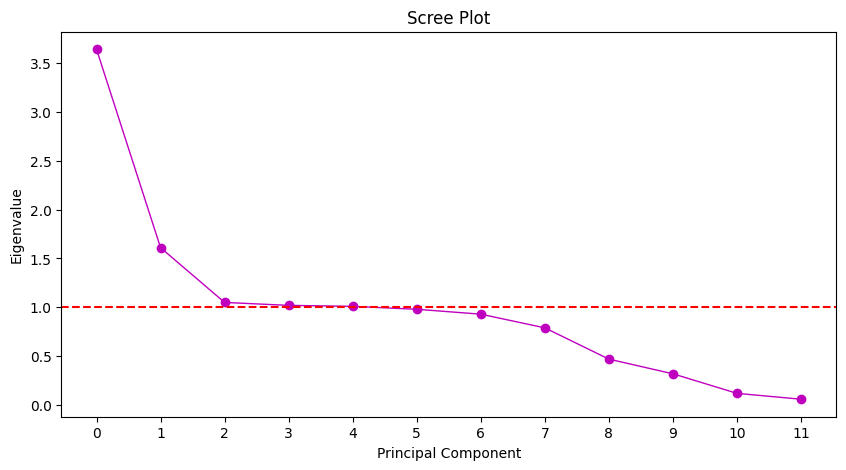

In [ ]:
# Define the x values, i.e., components
xvals = np.arange(0, len(eig))

# Figure size
plt.figure(figsize=(10, 5))

# Plot in red color
plt.plot(xvals, eig, 'mo-', linewidth=1)

# Set ticks to every unit
plt.xticks(xvals)

# Add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

# Add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='r', linestyle='--')

plt.show()


Using the percentage criterion I would take 4 components, using latent root I would pick 5 components, and using the scree plot I would pick 2. We will go with the latent root criterion as factors having latent roots or eigenvalues greater than 1 are considered significant/super variables.

In [ ]:
# Keeping the first 5 Com
# fit() function runs the PCA and shows the % of var explained
# fit_transform() function runs the PCA and shows the actual PCA values (the components score)
pcs = PCA(n_components=5)
principalComponents = pcs.fit_transform(preprocessing.scale(data))

# Make the output more readable by creating a new dataframe
principalDF = pd.DataFrame(
        data = principalComponents.round(2),
        columns = ['F1','F2','F3','F4', 'F5']
        )

principalDF

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.


,F1,F2,F3,F4,F5
0,-2.66,-1.64,0.74,-0.12,-0.39
1,-2.46,0.51,0.86,-0.45,-0.66
2,-2.58,-0.81,0.97,-0.35,-0.33
3,-2.25,0.79,0.40,0.21,-1.92
4,-2.57,-1.03,0.80,-0.12,-0.66
...,...,...,...,...,...
307403,-2.41,-0.67,-0.54,-1.81,0.88
307404,-2.24,0.81,-0.58,-2.02,0.77
307405,-2.04,1.03,-0.63,-1.93,0.83
307406,-2.37,-0.80,-0.63,-1.25,-0.39


In [ ]:
# Confirm component scores are orthogonal (small correlations)
principalDF.corr().round(4)

,F1,F2,F3,F4,F5
F1,1.0,-0.0,-0.0,-0.0,-0.0
F2,-0.0,1.0,0.0,0.0,-0.0
F3,-0.0,0.0,1.0,0.0,-0.0
F4,-0.0,0.0,0.0,1.0,-0.0
F5,-0.0,-0.0,-0.0,-0.0,1.0


In [ ]:
# Get the loadings for each component
loadings = pd.DataFrame(data=pcs.components_.T, columns=['F1', 'F2', 'F3', 'F4', 'F5'], index=data.columns)

# Display the loadings
print("Loadings for each variable on each component:")
print(loadings)

Loadings for each variable on each component:
                        F1        F2        F3        F4        F5
distance          0.336703  0.123022 -0.266285  0.019429  0.045215
destination      -0.181251  0.040985  0.643926 -0.344730 -0.213390
source           -0.164674  0.073218 -0.594787 -0.561569 -0.144703
price             0.166839  0.663938 -0.040899 -0.023710 -0.005966
surge_multiplier  0.074697  0.362663  0.314889  0.139873  0.038977
name             -0.034046 -0.598581  0.007586  0.109999  0.060624
weekday           0.000055  0.002117  0.160393 -0.265458  0.628751
time              0.000486  0.000642 -0.002518 -0.257698  0.674883
temp             -0.264238  0.134560 -0.176413  0.626739  0.273436
clouds            0.492893 -0.103618  0.036004  0.014983  0.000239
rain             -0.475656  0.086282 -0.022089 -0.035409 -0.012310
wind             -0.503065  0.104375 -0.034012  0.045178  0.023190


Component Naming Proposal:
<br>First Component: Bad Weather (clouds, rain, wind)
<br>Second Component: Price Sensitivity (price, surge multiplier, name)
<br>Third Component: Distance and Location (distance, source, destination)
<br>Fourth Component: Good Temperature (temp)
<br>Fifth Component: Time Stamp (weekday, time)


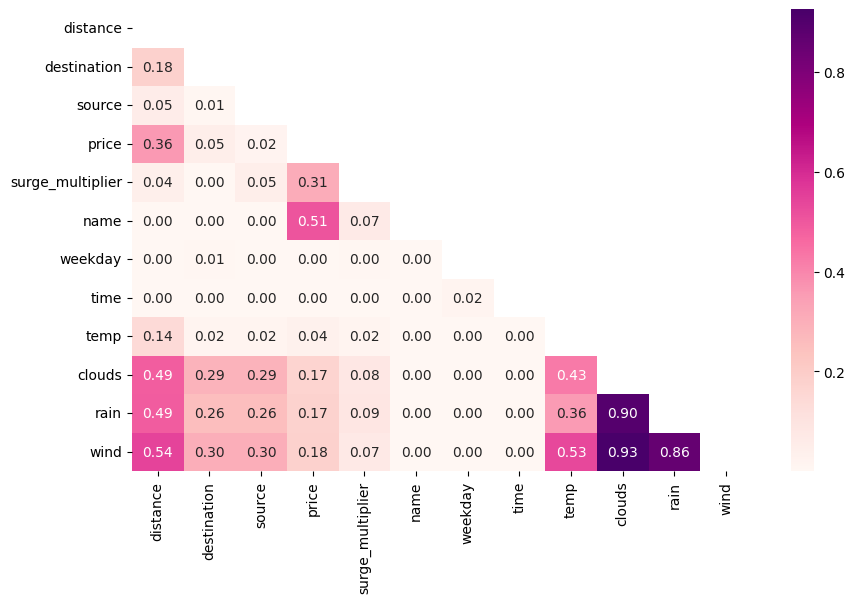

In [ ]:
# Correlation Heat Map POST PCA REDUCTION

# Calculate correlation matrix
corr_mat = data.corr()

# Create a mask for the lower triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Create seaborn heatmap with masked lower triangle, making everything absolute so we can account for the magnitude of corr but not the sign
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the horizontal size of the figure
sns.heatmap(np.absolute(corr_mat), annot=True, fmt=".2f", cmap='RdPu', mask=mask, ax=ax)  # Format values to 2 decimal places

# Display the heatmap
plt.show()

# Linear Regression

Let's see which of our PCA-decided components have the greatest impact on pricing model [P2] using a Linear Regression model fitted to 60% of our dataset.

In [ ]:
y1 = principalDF['F2']
x1 = principalDF.drop(columns=['F2'], axis = 1)

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.4, random_state = 1, stratify = None)

In [ ]:
pcapm = LinearRegression()
pcapm.fit(x1_train, y1_train)
pcapm

LinearRegression()

In [ ]:
coeffs = principalDF.drop(columns=['F2'])

print('intercept ', pcapm.intercept_)
coefficients = pd.DataFrame({'coeff': pcapm.coef_}, index=coeffs.columns)
coefficients

intercept  0.0015018085927187756


,coeff
F1,0.000164
F3,0.002192
F4,0.003007
F5,-0.000108


In [ ]:
#Let's see relative weight using a min-max scaler

scaler = MinMaxScaler()
coeffscaled = scaler.fit_transform(coefficients)
cspd = pd.DataFrame(coeffscaled, columns = coefficients.columns)
cspd

,coeff
0,0.087286
1,0.738346
2,1.000000
3,0.000000


Let's check how strong the predictive accuracy of this model is using the mean squared error and root mean squared error.


In [ ]:
y1_pred = pcapm.predict(x1_test)

mse = mean_squared_error(y1_test, y1_pred)
mse

print('rmse:', np.sqrt(mse))
print('mse:', mse)

rmse: 1.266604442449046
mse: 1.6042868136316584


#kNN

##Classifying each ride using kNN to determine if it will be higher or lower than the average price

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from tqdm import tqdm

y2 = principalDF['F2']
x2 = principalDF.drop(columns=['F2'], axis =1)

x2train, x2test, y2train, y2test = train_test_split(x2, y2, test_size=0.4, random_state =1)


results = []
for k in tqdm(range(1, 51, 1)):
    knn = KNeighborsRegressor(n_neighbors=k).fit(x2train, y2train)
    y2pred = knn.predict(x2test)
    results.append({
        'k': k,
        'mse': mean_squared_error(y2test, y2pred)
    })


100%|██████████| 50/50 [03:27<00:00,  4.16s/it]


In [ ]:
results_df = pd.DataFrame(results)
results_df['rmse'] = np.sqrt(results_df['mse'])
results_df

,k,mse,rmse
0,1,0.160130,0.400162
1,2,0.146279,0.382465
2,3,0.149621,0.386809
3,4,0.154595,0.393186
4,5,0.160372,0.400465
5,6,0.165925,0.407339
6,7,0.171525,0.414156
7,8,0.177620,0.421450
8,9,0.183536,0.428411
9,10,0.188529,0.434200


In [ ]:
results_df.min()
# Find value from index 1 --> from table, we see the best k is when k=2

k       1.000000
mse     0.146279
rmse    0.382465
dtype: float64

# Decision Trees

## First, let's just start with the full 'data' and make our decision tree models on that:

Making a fully fitted tree just for error metrics comparisons. However, we know that using just these 2 rules would usually lead to a “full tree” which will likely be overfitted/predicted perfectly…capturing noise in addition to data.

In [ ]:
# Preprocessing
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize the DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(random_state=100)

# Fit the model on the training data
reg_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = reg_tree.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f' Residual Mean Squared Error: {mse}')

 Residual Mean Squared Error: 3.5125128964575


In [ ]:
### THIS TAKES LIKE YEARS TO RUN PLEASE DO NOT HURT YOUR COMPUTER UNLESS YOU HAVE TO
# Visualize the full tree via "plot_tree" function, 'filled' option generates colors in the nodes
plt.figure(figsize=(15,10))
tree.plot_tree(reg_tree, filled=True)

Now let's move on to changing parameters through grid search to limit tree growth for optimal accuracy.

In [ ]:
# Define the parameter grids
min_samples_split_values = [2, 5, 10, 15, 20]
max_depth_values = [3, 5, 10, 15, 20]

best_rmse = 100000
best_params = {}
best_tree = 0

# I literally took my rust code for this and just switched it to python idk
for min_samples_split in min_samples_split_values:
    for max_depth in max_depth_values:
        # Create and fit the decision tree model
        reg_tree_paramchanged = DecisionTreeRegressor(min_samples_split=min_samples_split, max_depth=max_depth, random_state=100)
        reg_tree_paramchanged.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = reg_tree_paramchanged.predict(X_test)

        # Calculate RMSE
        rmse = mean_squared_error(y_test, y_pred, squared=False)

        # Update best parameters if this combination is better
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'min_samples_split': min_samples_split, 'max_depth': max_depth}
            best_tree = reg_tree_paramchanged

print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)

Best Hyperparameters: {'min_samples_split': 20, 'max_depth': 15}
Best RMSE: 1.4218347034711611


Now that we know the best parameters resulting in best RMSE of 1.4218347034711611, {'min_samples_split': 20, 'max_depth': 15}, let's visualize the tree.



[Text(0.5249859720303868, 0.9545454545454546, 'x[5] <= 2.5\nsquared_error = 100.368\nsamples = 245926\nvalue = 17.35'),
 Text(0.28354842886740333, 0.8636363636363636, 'x[5] <= 1.5\nsquared_error = 76.847\nsamples = 122973\nvalue = 24.373'),
 Text(0.15289407803867403, 0.7727272727272727, 'x[0] <= 2.175\nsquared_error = 41.791\nsamples = 82041\nvalue = 20.4'),
 Text(0.07924723756906077, 0.6818181818181818, 'x[5] <= 0.5\nsquared_error = 14.799\nsamples = 41841\nvalue = 16.444'),
 Text(0.03975310773480663, 0.5909090909090909, 'x[0] <= 1.485\nsquared_error = 8.261\nsamples = 20985\nvalue = 14.167'),
 Text(0.018732734806629833, 0.5, 'x[4] <= 1.375\nsquared_error = 4.545\nsamples = 13772\nvalue = 12.927'),
 Text(0.008459944751381215, 0.4090909090909091, 'x[0] <= 0.935\nsquared_error = 2.597\nsamples = 13405\nvalue = 12.714'),
 Text(0.004488950276243094, 0.3181818181818182, 'x[4] <= 1.125\nsquared_error = 0.747\nsamples = 4104\nvalue = 11.023'),
 Text(0.0027624309392265192, 0.22727272727272727

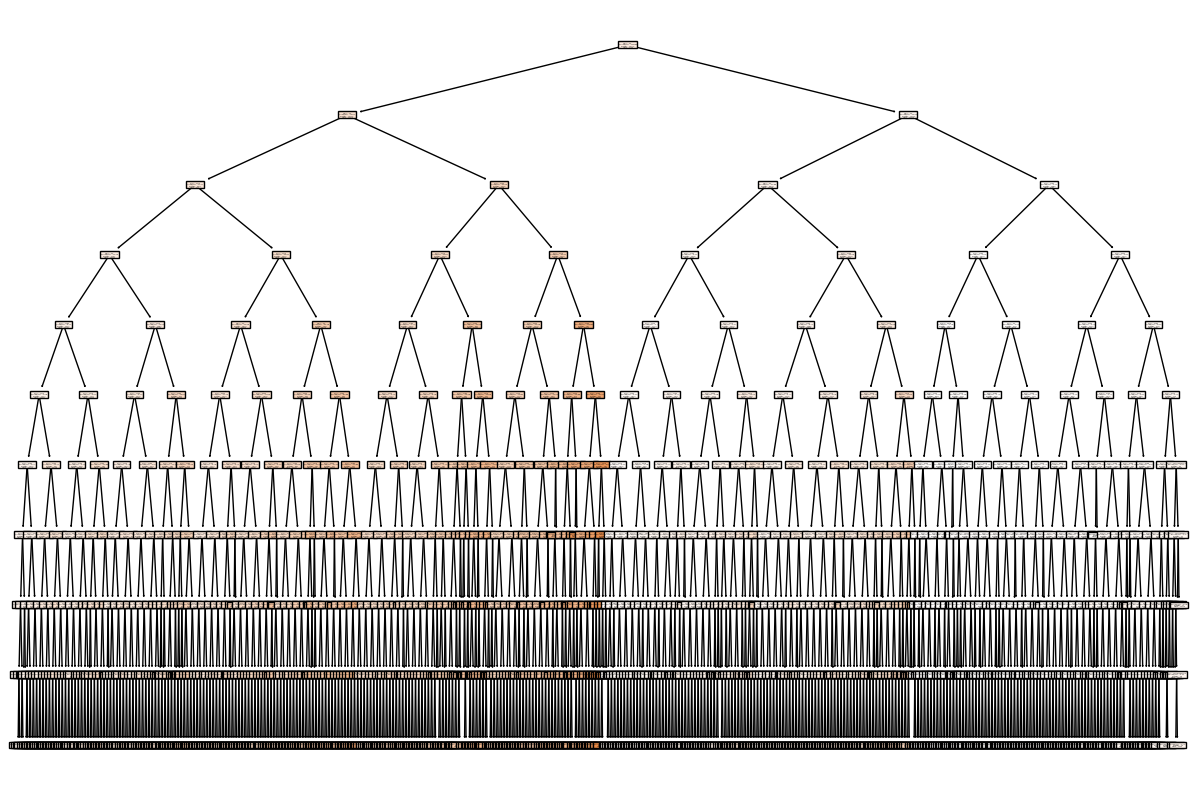

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(best_tree, filled=True)

Now, lets move on to creating a full tree random forest regression model. The random forest provides a more stable prediction.

In [ ]:
# Create and train the Random Forest Regressor
rf_all = RandomForestRegressor(n_estimators=1000, random_state=100, criterion='squared_error', n_jobs = 4)
rf_all.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_all.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 2.030805825021384
R-squared: 0.9797822639052133


We can also make a random forest regressor while limiting the min_samples_split' to 20 and 'max_depth' to 15. Since these are the best hyperparamaters that resulted in lowest rmse for a single tree, we want to experiment with seeing random forest rmse with these hyperparamaters as well.

In [ ]:
# Create and train the Random Forest Regressor
rf_all_paramadj = RandomForestRegressor(n_estimators=1000, random_state=100, criterion='squared_error', min_samples_split=20, max_depth=15, n_jobs = 4)
rf_all_paramadj.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_all_paramadj.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 1.8382020113083521
R-squared: 0.981699735791753


## Now let's use our PCA components.

In [ ]:
## WORKS POST PCA UPDATE
# Preprocessing
XPCA = principalDF
yPCA = data['price']
XPCA_train, XPCA_test, yPCA_train, yPCA_test = train_test_split(XPCA, yPCA, test_size=0.2, random_state=100)

# Initialize the DecisionTreeRegressor
reg_treePCA = DecisionTreeRegressor(random_state=100)

# Fit the model on the training data
reg_treePCA.fit(XPCA_train, yPCA_train)

# Predict on the test set
y_predPCA = reg_treePCA.predict(XPCA_test)

# Evaluate the model
mse = mean_squared_error(yPCA_test, y_predPCA)
print(f' Residual Mean Squared Error: {mse}')

 Residual Mean Squared Error: 1.9224207491623564


In [ ]:
## WORKS POST PCA UPDATE
# Define the parameter grids
min_samples_split_values = [2, 5, 10, 15, 20]
max_depth_values = [3, 5, 10, 15, 20]

best_rmsePCA = 100000000
best_paramsPCA = {}
best_treePCA = 0

for min_samples_split in min_samples_split_values:
    for max_depth in max_depth_values:
        # Create and fit decision tree model
        reg_tree_paramchangedPCA = DecisionTreeRegressor(min_samples_split=min_samples_split, max_depth=max_depth, random_state=100)
        reg_tree_paramchangedPCA.fit(XPCA_train, yPCA_train)

        # Make predictions on  test set
        y_predPCA = reg_tree_paramchangedPCA.predict(XPCA_test)

        # Calculate RMSE
        rmse = mean_squared_error(yPCA_test, y_predPCA, squared=False)

        # Update best parameters if this combination is better
        if rmse < best_rmsePCA:
            best_rmsePCA = rmse
            best_paramsPCA = {'min_samples_split': min_samples_split, 'max_depth': max_depth}
            best_treePCA = reg_tree_paramchangedPCA

print("Best Hyperparameters:", best_paramsPCA)
print("Best RMSE:", best_rmsePCA)

Best Hyperparameters: {'min_samples_split': 10, 'max_depth': 20}
Best RMSE: 1.391871319373697


[Text(0.4148332114222864, 0.9761904761904762, 'x[1] <= -0.175\nsquared_error = 100.368\nsamples = 245926\nvalue = 17.35'),
 Text(0.1536165847838563, 0.9285714285714286, 'x[1] <= -1.175\nsquared_error = 18.472\nsamples = 118514\nvalue = 9.865'),
 Text(0.06612077426260199, 0.8809523809523809, 'x[0] <= -0.675\nsquared_error = 7.608\nsamples = 48579\nvalue = 6.746'),
 Text(0.027574402456083003, 0.8333333333333334, 'x[1] <= -1.605\nsquared_error = 1.957\nsamples = 16331\nvalue = 4.726'),
 Text(0.01215501463546133, 0.7857142857142857, 'x[0] <= -2.035\nsquared_error = 0.913\nsamples = 5809\nvalue = 3.917'),
 Text(0.005778831540427411, 0.7380952380952381, 'x[1] <= -1.665\nsquared_error = 0.513\nsamples = 3148\nvalue = 3.521'),
 Text(0.002141723057590912, 0.6904761904761905, 'x[1] <= -1.755\nsquared_error = 0.097\nsamples = 1549\nvalue = 3.199'),
 Text(0.00040754294059212594, 0.6428571428571429, 'x[1] <= -1.805\nsquared_error = 0.019\nsamples = 429\nvalue = 2.998'),
 Text(0.000271695293728084, 

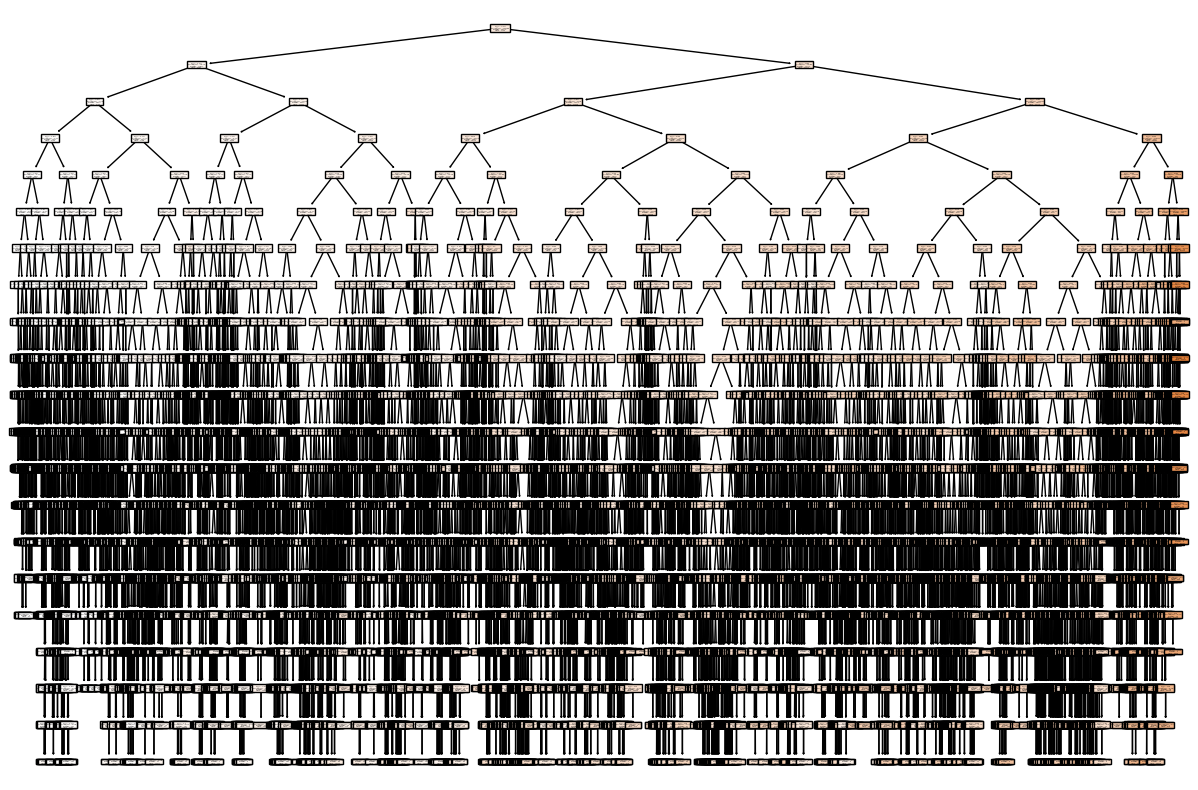

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(best_treePCA, filled=True)

Now, lets move on to creating a full tree random forest regression model built on the 5 PCA Components. The random forest provides a more stable prediction.

In [ ]:
# Create and train the Random Forest Regressor
rf_PCA = RandomForestRegressor(n_estimators=1000, random_state=100, criterion='squared_error', n_jobs = 4)
rf_PCA.fit(XPCA_train, yPCA_train)

# Make predictions on the test set
yPCA_pred = rf_PCA.predict(XPCA_test)

# Evaluate the model using MSE
mse = mean_squared_error(yPCA_test, yPCA_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(yPCA_test, yPCA_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 1.0706476352422272
R-squared: 0.9893411417905467


We can also make a random forest regressor while limiting the min_samples_split' to 10 and 'max_depth' to 20. Since these are the best hyperparamaters that resulted in lowest rmse for a single tree, we want to experiment with seeing random forest rmse with these hyperparamaters as well.

In [ ]:
# Create and train the Random Forest Regressor
rf_PCA_paramadj = RandomForestRegressor(n_estimators=1000, random_state=100, criterion='squared_error', min_samples_split=10, max_depth=20, n_jobs = 4)
rf_PCA_paramadj.fit(XPCA_train, yPCA_train)

# Make predictions on the test set
yPCA_pred = rf_PCA_paramadj.predict(XPCA_test)

# Evaluate the model using MSE
mse = mean_squared_error(yPCA_test, yPCA_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(yPCA_test, yPCA_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 1.2449533105925021
R-squared: 0.9876058374593124


# Deep Learning


## Preprocessing

In [ ]:
# Separate out output neuron and input neurons
y_nonscaled = data[['price']]
X_nonscaled = data.drop(columns=['price'])
X_nonscaled.head()

,distance,destination,source,surge_multiplier,name,weekday,time,temp,clouds,rain,wind,squared_diff
0,0.44,7,5,1.0,5,3,3.420789e+10,39.051606,0.676855,0.008654,6.839474,152.556986
1,0.44,7,5,1.0,0,5,7.223677e+09,39.051606,0.676855,0.008654,6.839474,40.340233
2,0.44,7,5,1.0,3,6,3.622198e+09,39.051606,0.676855,0.008654,6.839474,107.151402
3,0.44,7,5,1.0,2,0,1.758275e+10,39.051606,0.676855,0.008654,6.839474,74.798349
4,0.44,7,5,1.0,4,4,1.376022e+10,39.051606,0.676855,0.008654,6.839474,69.745817


In [ ]:
# Normalize the data into [0,1] range
scaleOutput = MinMaxScaler()
scaleInput = MinMaxScaler()

y = scaleOutput.fit_transform(y_nonscaled)
X = scaleInput.fit_transform(X_nonscaled)

# Partitioning data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

# Checking normalization worked
X_train[0,:]

array([0.05050505, 1.        , 0.45454545, 0.        , 0.6       ,
       0.16666667, 0.98535849, 0.12077273, 0.10629921, 1.        ,
       0.77845256, 0.01656941])

## Neural Network and Deep Learning


min predicted price: 0.008106565433803545
max predicted price 1.726348072777233
min predicted price: 3.270123716211337
max predicted price 166.50306691383713

Regression statistics

                      Mean Error (ME) : -0.7988
       Root Mean Squared Error (RMSE) : 6.1277
            Mean Absolute Error (MAE) : 5.1887
          Mean Percentage Error (MPE) : -4.9713
Mean Absolute Percentage Error (MAPE) : 35.4253


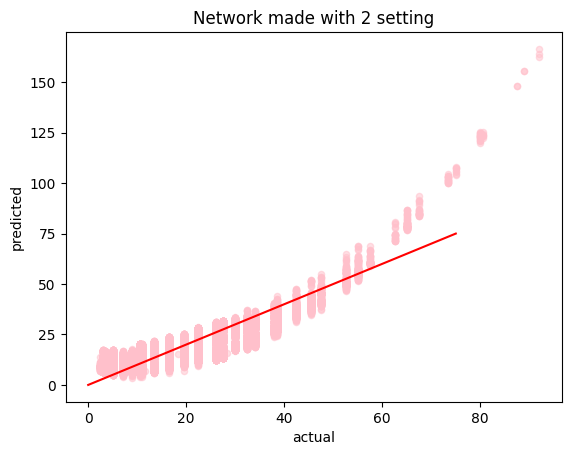

min predicted price: 0.02500017561023138
max predicted price 1.7408134987822557
min predicted price: 4.875016682971981
max predicted price 167.8772823843143

Regression statistics

                      Mean Error (ME) : 0.2976
       Root Mean Squared Error (RMSE) : 6.0808
            Mean Absolute Error (MAE) : 5.2311
          Mean Percentage Error (MPE) : 2.9289
Mean Absolute Percentage Error (MAPE) : 32.9364


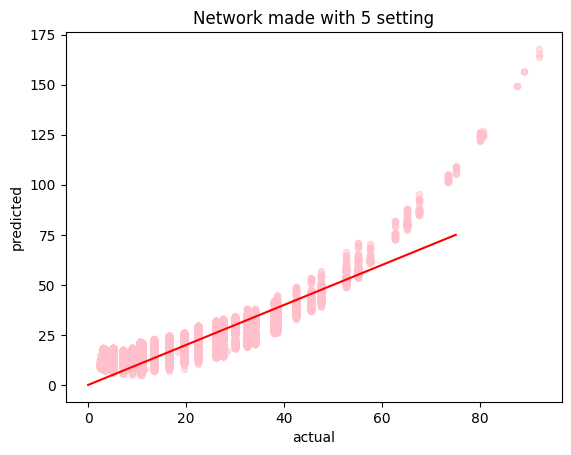

min predicted price: 0.027855113401552556
max predicted price 1.7166254420143217
min predicted price: 5.146235773147493
max predicted price 165.57941699136057

Regression statistics

                      Mean Error (ME) : 0.9251
       Root Mean Squared Error (RMSE) : 6.1455
            Mean Absolute Error (MAE) : 5.2897
          Mean Percentage Error (MPE) : 6.7956
Mean Absolute Percentage Error (MAPE) : 31.9670


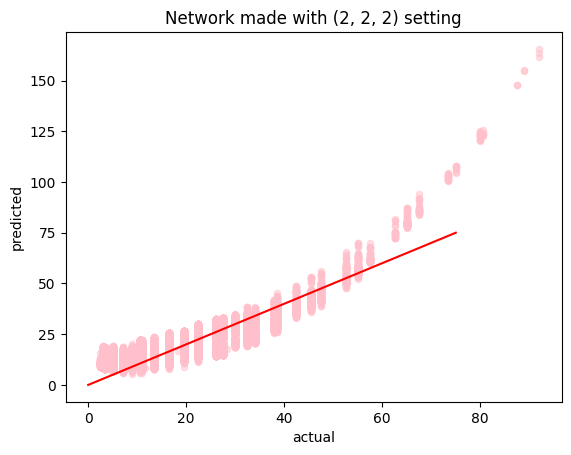

min predicted price: 0.02372421804201852
max predicted price 1.7047422092964948
min predicted price: 4.753800713991759
max predicted price 164.45050988316703

Regression statistics

                      Mean Error (ME) : 0.4364
       Root Mean Squared Error (RMSE) : 6.0913
            Mean Absolute Error (MAE) : 5.2491
          Mean Percentage Error (MPE) : 3.9911
Mean Absolute Percentage Error (MAPE) : 32.6428


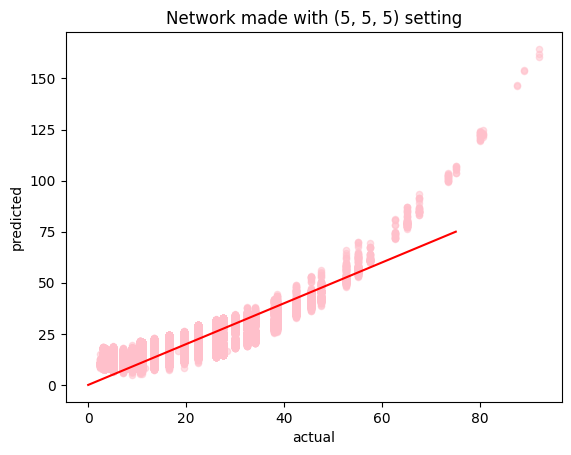

In [ ]:
# Creating a function that can be used for creating many different networks, could have future use if we were to expand our modeling capabilities to generate deep learning networks with more nodes+layers

def LyftNNCreator(size):
  LyftNN = MLPRegressor(hidden_layer_sizes=size, activation='identity', solver='adam', random_state=1)
  LyftNN.fit(X_train, y_train.ravel())

  # Making price predictions
  y_pred = LyftNN.predict(X_valid)

  # Check out the range of predicted prices
  print('min predicted price:',  min(y_pred))
  print("max predicted price", max(y_pred))

  # All prices are between 0 and 1 since we normalized... hence, we have to "denormalize" to return back to our original space of prices
  # Inverse scaling using inverse_transform function
  # Note: append the ravel() function to reformat the output of inverse_transform()
  y_actual = scaleOutput.inverse_transform(y_valid).ravel()
  y_pred = scaleOutput.inverse_transform([LyftNN.predict(X_valid)]).ravel()

  print('min predicted price:',  min(y_pred))
  print("max predicted price", max(y_pred))

  # Run regression summary to check RMSE
  regressionSummary(y_pred, y_actual)

  # Predicted vs actual values plots
  pd.DataFrame({'actual': y_actual, 'predicted': y_pred}).plot.scatter(x='actual', y='predicted', alpha=0.5, color="pink")
  plt.plot([0, 75], [0, 75], color='red')
  plt.title("Network made with " + str(size) + " setting")
  plt.show()

LyftNNCreator((2))
LyftNNCreator((5))
LyftNNCreator((2,2,2))
LyftNNCreator((5,5,5))